In [55]:
#導入需要的依賴包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# 設置 Matplotlib 使用的字體
plt.rcParams['font.sans-serif'] = ['SimHei'] 
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



# #統計預測圖
seaborn.relplot() 是一個非常好用的繪圖指令, 可以一次把數個變數的關係呈現在一張圖表上.

`load_dataset` looks for online csv files on https://github.com/mwaskom/seaborn-data. Here's the docstring:<br>

Load a dataset from the online repository (requires internet).<br>

>Parameters

>name : str Name of the dataset (name.csv on https://github.com/mwaskom/seaborn-data). You can obtain list of available datasets using func:get_dataset_names<br>
kws : dict, optional Passed to pandas.read_csv


In [13]:
#加載sns內置數據集 
tips=sns.load_dataset("tips")
sns.set(color_codes=True)
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3



內建數據集-tips數據集 
> 關於數據集，total_bill是消費總金額，tip是小費，size指用餐人數。

In [16]:
NBA = sns.load_dataset('data/NBA_season1718_salary.csv')

ValueError: 'data/NBA_season1718_salary.csv' is not one of the example datasets.

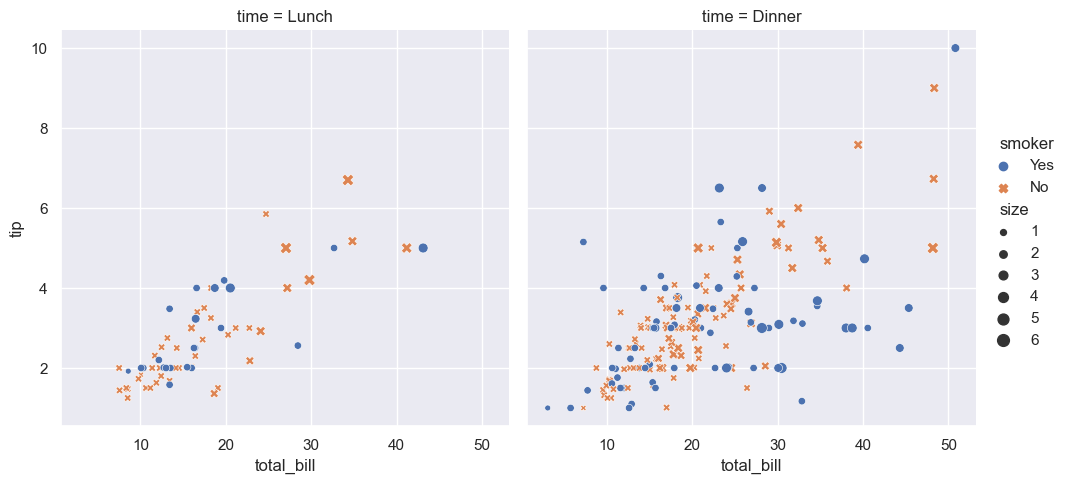

In [18]:
sns.relplot(x='total_bill',y='tip',col='time',hue='smoker',style='smoker',size='size',data=tips)

# #單變量分析繪圖（直方圖、條形圖）
> Dataset: NBA_season1718_salary.csv<br>
ref:https://www.kaggle.com/koki25ando/salary

In [58]:
#讀入數據
data=pd.read_csv('data/NBA_season1718_salary.csv')
data

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0
...,...,...,...,...
568,569,Quinn Cook,NOP,25000.0
569,570,Chris Johnson,HOU,25000.0
570,571,Beno Udrih,DET,25000.0
571,572,Joel Bolomboy,MIL,22248.0


In [60]:
#對讀進來的數據按薪資降序排序並取前10條數據
salary_top10=(data.sort_values("season17_18",ascending=False)).head(10)
salary_top10

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0
5,6,Kyle Lowry,TOR,28703704.0
6,7,Russell Westbrook,OKC,28530608.0
7,8,Mike Conley,MEM,28530608.0
8,9,James Harden,HOU,28299399.0
9,10,DeMar DeRozan,TOR,27739975.0


In [62]:
#取出球員列數據，作為條形圖橫坐標
player=salary_top10['Player']


#取出球員薪資列，作為條形圖縱坐標
season_salary=salary_top10['season17_18']


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

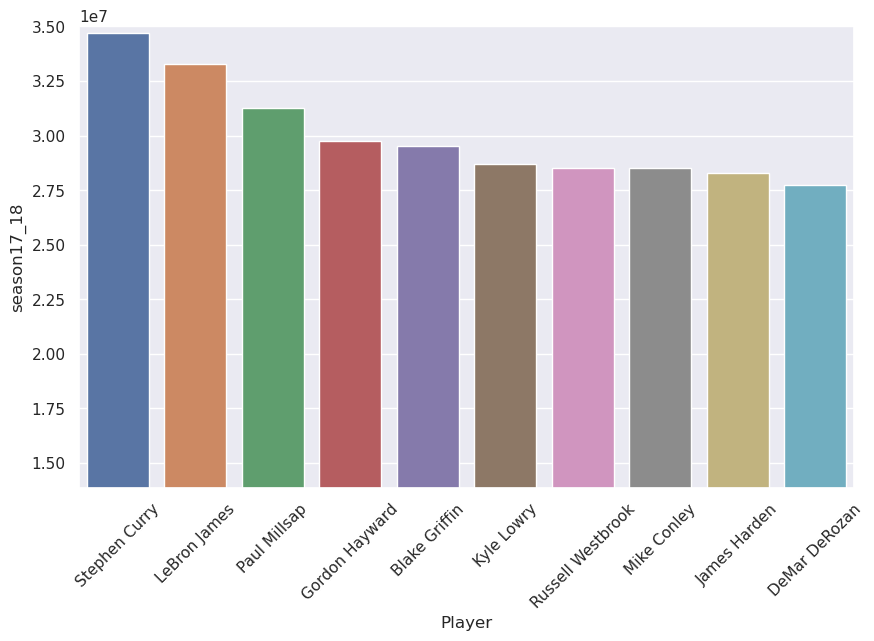

In [74]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)

#plt.ylim：這個函數用於設置y軸的範圍。
#season_salary.min() * 0.5：這是y軸的下限，將最小值縮小到原來的一半，這樣可以更好地觀察數據。
#season_salary.max() * 1.01：這是y軸的上限，將最大值稍微放大1%，以確保最大值不會貼邊。

plt.ylim(season_salary.min()*0.5,season_salary.max()*1.01)

#ci參數表示允許的誤差範圍（控制誤差棒的百分比，在0-100之間）
sns.barplot(x=player,y=season_salary,data=salary_top10,ci=68)

import warnings
warnings.filterwarnings("ignore", category=Warning)



## Result

從條形圖中不難看出，勇士隊的當家球星curry資最高，將近達到3500萬美元，位居第二的是勒布朗詹姆斯，也是在3300萬美元以上。上面的條形圖是按球員作為橫坐標，下面我們按球隊匯總，看看哪個球隊的薪資總額最高。

# 練習 - 彙總球隊薪資繪製成直方圖
按球隊匯總，看看哪個球隊的薪資總額最高。

In [76]:
salary_byteam=data.groupby(by='Tm').sum()
salary_byteam

,Unnamed: 0,Player,season17_18
Tm,,,
ATL,9324,Kent BazemoreDennis SchroderMiles PlumleeJamal...,100217797.0
BOS,4712,Gordon HaywardAl HorfordKyrie IrvingJayson Tat...,115009962.0
BRK,4953,Allen CrabbeTimofey MozgovDeMarre CarrollJerem...,96039772.0
CHI,7551,Dwyane WadeRobin LopezOmer AsikCristiano Felic...,89425042.0
CHO,3061,Dwight HowardNicolas BatumMarvin WilliamsMicha...,117228164.0
CLE,2979,LeBron JamesKevin LoveGeorge HillTristan Thomp...,137288549.0
DAL,7636,Harrison BarnesWesley MatthewsDwight PowellJos...,85821361.0
DEN,3624,Paul MillsapMason PlumleeKenneth FariedWilson ...,107889099.0
DET,5639,Blake GriffinAndre DrummondReggie JacksonJon L...,120086105.0


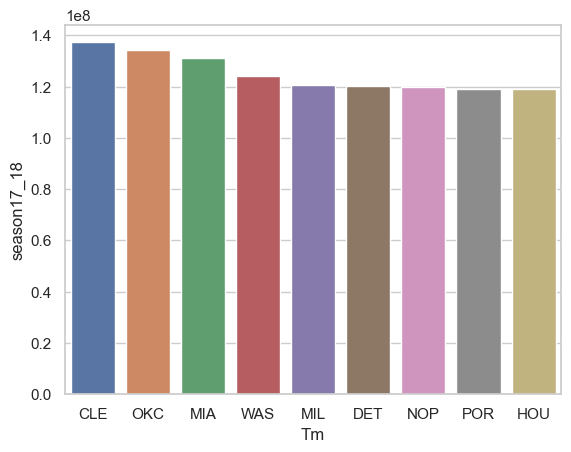

In [88]:
#先將資料集用groupby根據球隊分別匯總

#这一行将数据根据球队（'Tm' 列）进行分组，并对每个分组（每支球队）的薪水进行求和。reset_index() 用于重新设置索引，以便获得一个新的数据框。
salary_by_team=data.groupby(by='Tm').sum().reset_index()

#这一行对球队按照薪水总和（'season17_18' 列）进行降序排序，使得薪水最高的球队排在前面。
salary_by_team=salary_by_team.sort_values(by='season17_18',ascending=False)

#这一行选择排名在前10的球队，使用切片操作来获取排名在第1到第9的行
tm_top10=salary_by_team[1:10]

#这一行提取了排名前10的球队的名称（'Tm' 列），存储在名为 tm 的变量中。
tm=tm_top10['Tm']

#这一行提取了排名前10的球队的薪水总和（'season17_18' 列），存储在名为 salary_sum 的变量中。
salary_sum=tm_top10['season17_18']

#这一行使用 Seaborn 的 barplot 函数创建了一个条形图，横坐标是球队名称，纵坐标是薪水总和。这样就可以直观地比较不同球队的薪水情况。
sns.barplot(x=tm, y=salary_sum)


sns.color_palette('hls',10)
sns.set(style="whitegrid")

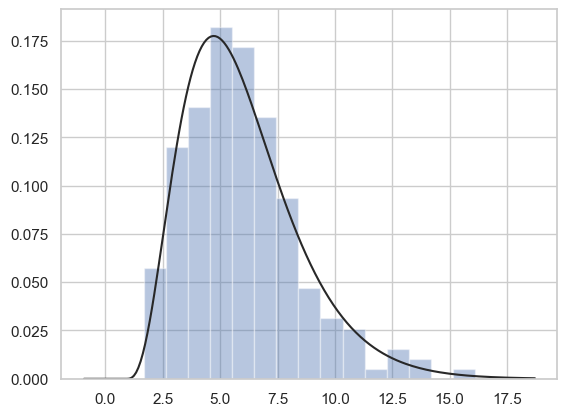

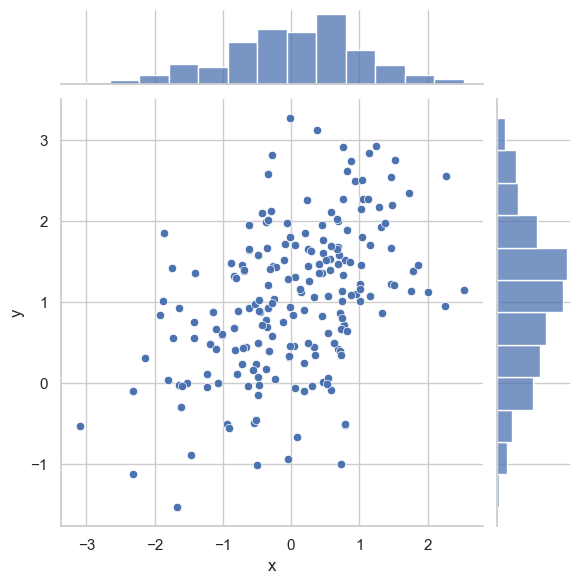

In [98]:
#這行代碼導入了 SciPy 中的統計模組，它包含了許多統計函數和分佈模型。
import scipy.stats as stats

#這行代碼生成了一個大小為 200 的隨機數組，這些數據來自於 Gamma 分佈，其中的形狀參數為 6。這個隨機數組被賦值給變數 x。
x = np.random.gamma(6, size=200)

#這行程式碼使用 Seaborn 的 distplot 函數繪製了 x 的直方圖，同時也顯示了擬合的 Gamma 分佈曲線。參數 kde=False 表示不顯示核密度估計曲線，而 fit=stats.gamma 則表示使用 SciPy 提供的 Gamma 分佈模型來擬合數據。
sns.distplot(x,kde=False,fit=stats.gamma)

#這行程式碼定義了多變量正態分佈的平均值和協方差矩陣。這裡的 mean 是一個包含兩個值的列表，分別表示 x 和 y 的平均值，而 cov 是一個包含協方差值的列表，它描述了 x 和 y 之間的關係。
mean, cov = [0,1], [(1,.5),(.5,1)]

#這行程式碼生成了一個大小為 200 的多變量正態分佈的數據集。np.random.multivariate_normal 函數用於生成符合指定平均值和協方差矩陣的多變量正態分佈數據。
data=np.random.multivariate_normal(mean,cov,200)

#這行程式碼將生成的多變量正態分佈數據轉換為 Pandas 的數據框，並將其列標籤分別命名為 "x" 和 "y"。
df=pd.DataFrame(data,columns=["x","y"])

#程式碼使用 Seaborn 的 jointplot 函數創建了一個散點圖和直方圖的聯合圖，顯示了數據集中 "x" 和 "y" 兩個變量之間的關係。
sns.jointplot(x="x",y="y",data=df)

# #seaborn回歸分析繪圖（regplot）

In [100]:
#導入依賴包 
%matplotlib inline 
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
#加載sns內置數據集 
tips=sns.load_dataset("tips")
sns.set(color_codes=True)
tips.head(3)
 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


內建數據集-tips數據集 
> 關於數據集，total_bill是消費總金額，tip是小費，size指用餐人數。

<Axes: xlabel='total_bill', ylabel='tip'>

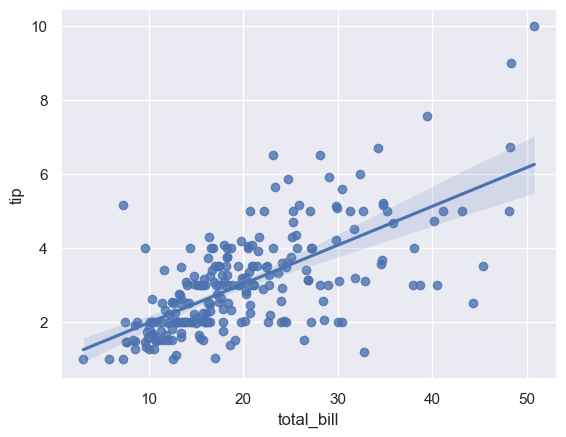

In [102]:
sns.regplot(data=tips,x="total_bill",y="tip")

# [練習]看看其他變量和小費之間的關係。


<Axes: xlabel='size', ylabel='tip'>

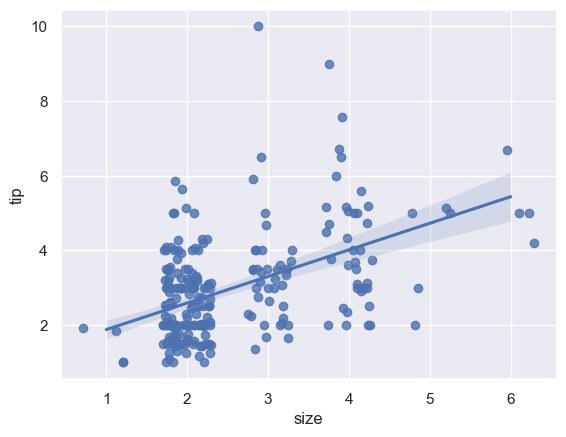

In [104]:
sns.regplot(data=tips,x="size",y="tip",x_jitter=0.3)

In [106]:
#導入依賴包 %matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style="whitegrid", color_codes=True) 
tips = sns.load_dataset("tips")


<Axes: xlabel='tip', ylabel='Density'>

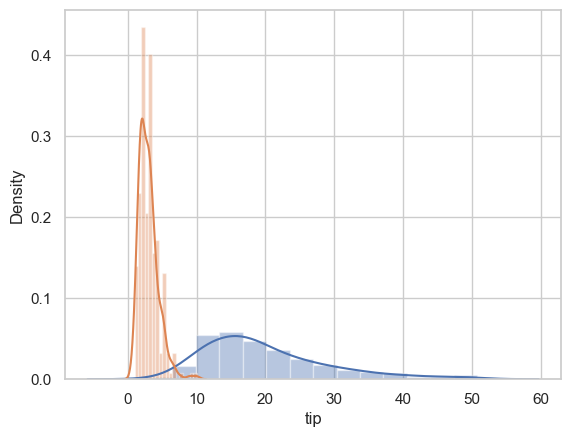

In [108]:
sns.distplot(tips['total_bill'])
sns.distplot(tips['tip'])

# #散點圖（分布散點、分簇散點圖）

<Axes: xlabel='total_bill', ylabel='tip'>

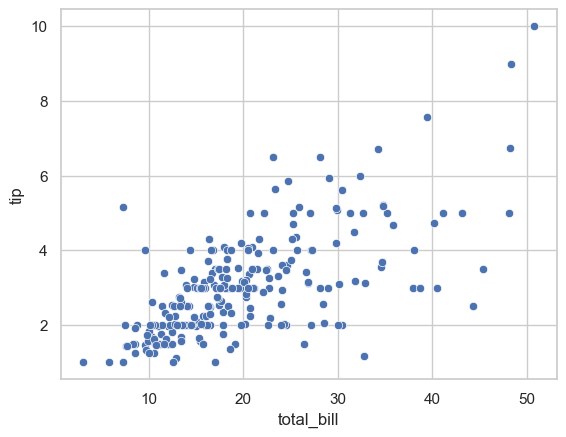

In [110]:
sns.scatterplot(x='total_bill',y='tip',data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

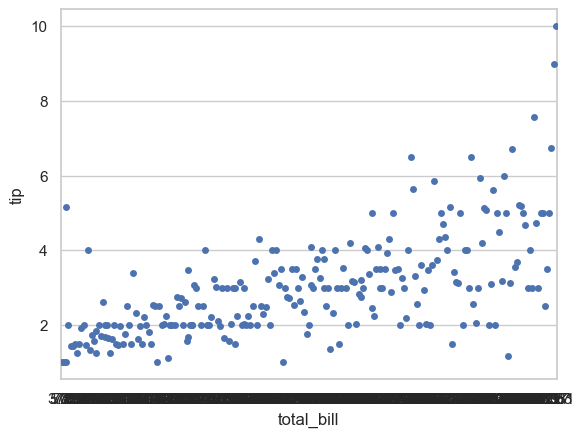

In [114]:
sns.stripplot(x='total_bill',y='tip',data=tips)

從上面的圖中可以看到，stripplot參數中的x是橫軸數據（分類數據），y是縱軸數據（類型對應數據），由於我們將總金額作為分類，導致分類太多，橫軸數據根本看不清，所以我們重新傳參，分別看下性別和小費、時間和小費，用餐日期跟小費之間的數據分布。

<Axes: xlabel='sex', ylabel='tip'>

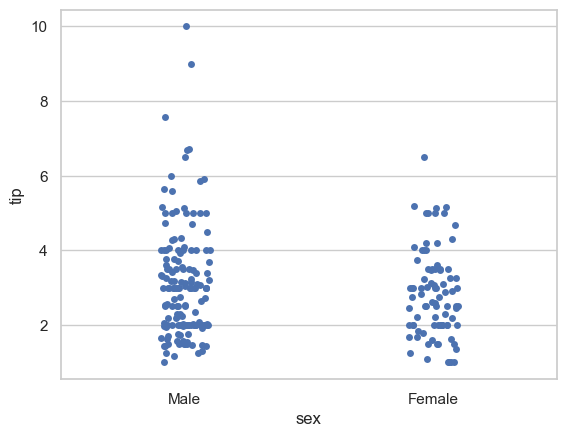

In [124]:
sns.stripplot(x='sex',y='tip',data=tips)

<Axes: xlabel='day', ylabel='tip'>

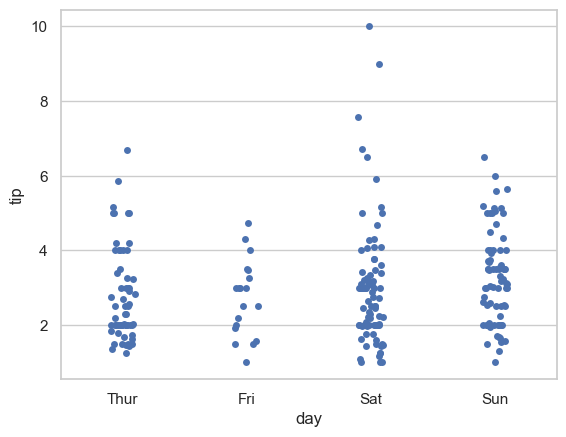

In [126]:
sns.stripplot(x='day',y='tip',data=tips)

<Axes: xlabel='time', ylabel='tip'>

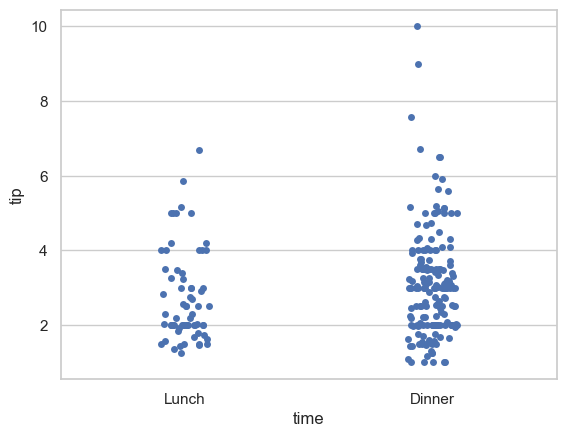

In [128]:
sns.stripplot(x='time',y='tip',data=tips)

<Axes: xlabel='smoker', ylabel='tip'>

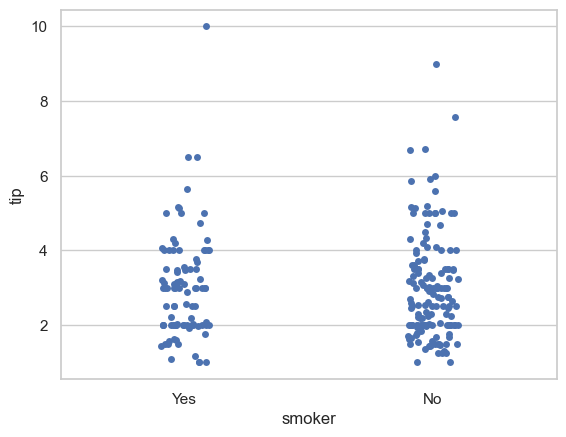

In [130]:
sns.stripplot(x='smoker',y='tip',data=tips)

因為jitter（數據抖動）這個參數的默認值是True,如果我們將其設置為False，效果如圖：


<Axes: xlabel='day', ylabel='tip'>

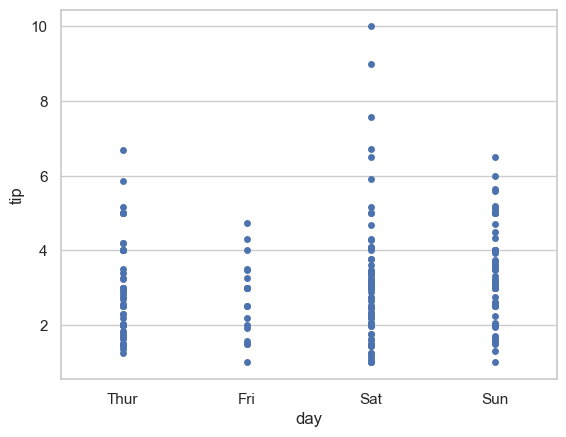

In [132]:
sns.stripplot(x='day',y='tip',jitter=False,data=tips)

<Axes: xlabel='day', ylabel='tip'>

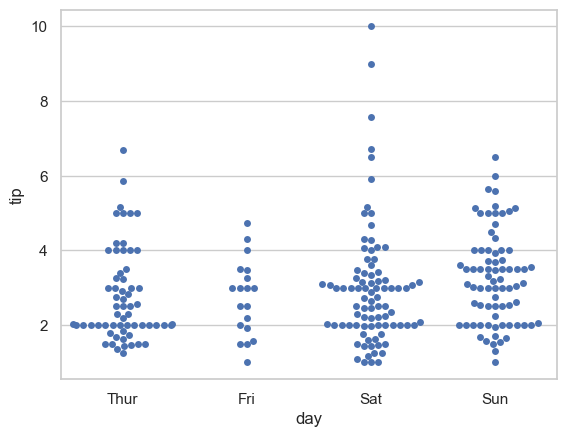

In [134]:
sns.swarmplot(x='day',y='tip',data=tips)

在stripplot函數中，我們只看了某一類別對應的數據，而沒有看類中對應其他類的數據分布，舉個例子，比如我們用stripplot看到男性和女性對應的小費數據，但是不知道男性和女性對應的數據中哪些是吸菸的，哪些是不吸菸的，對於這個問題這兩個函數都有一個hue參數，這裡我們就以分簇散點圖函數為例，演示下這個參數的效果，如圖：


<Axes: xlabel='day', ylabel='tip'>

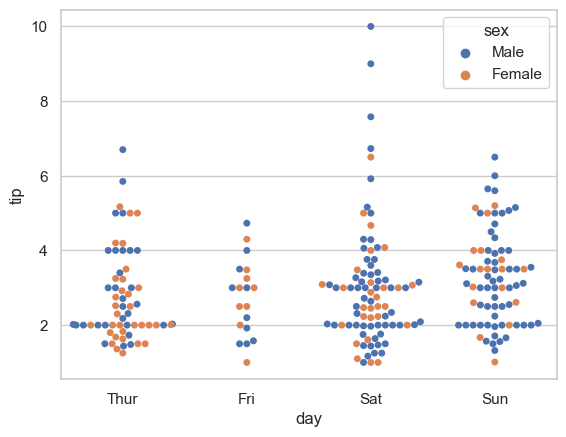

In [136]:
sns.swarmplot(x='day',y='tip',hue='sex',data=tips)

上面這個圖就很好的展示了不同性別在不同的星期中付小費數據的分布。

# #繪製盒圖、小提琴圖
seaborn.boxplot()
這個函數主要是繪製出一個箱型圖來反映離群點數據。

<Axes: xlabel='tip'>

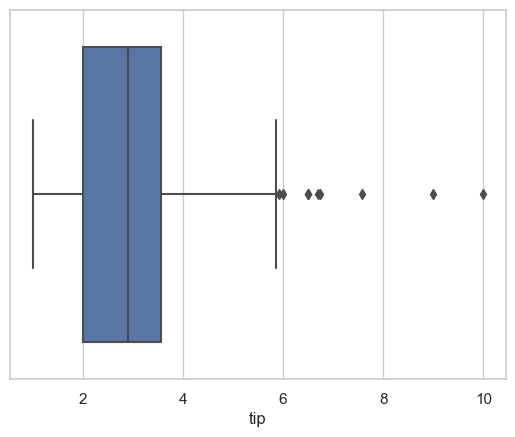

In [138]:
sns.boxplot(x='tip',data=tips)

<Axes: ylabel='tip'>

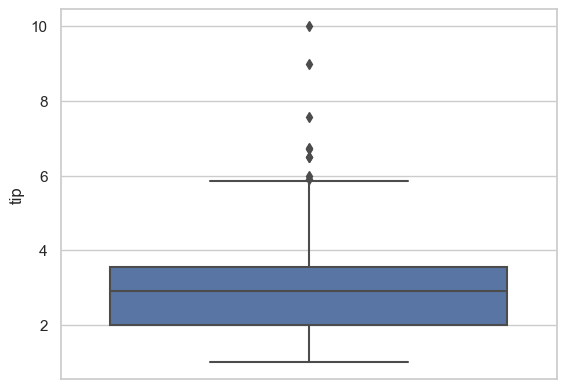

In [140]:
sns.boxplot(y='tip',data=tips)

<Axes: xlabel='day', ylabel='tip'>

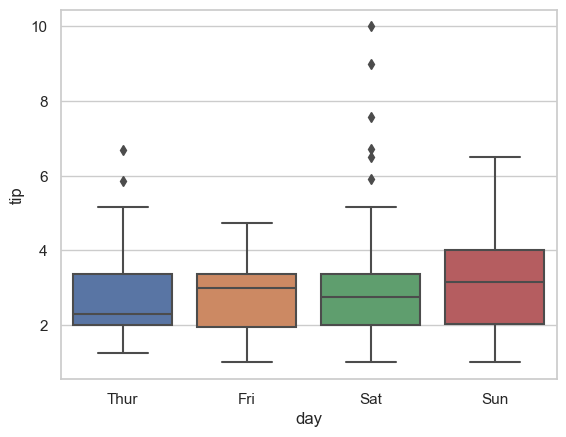

In [142]:
sns.boxplot(x='day',y='tip',data=tips)

seaborn庫中的很多繪圖方法就是提前給你畫好模板，我們只需要把數據傳進去就得到相應的圖形，
基於此，我門是不是可以在同一個模板上同時繪製分簇圖和箱型圖呢？

<Axes: xlabel='day', ylabel='total_bill'>

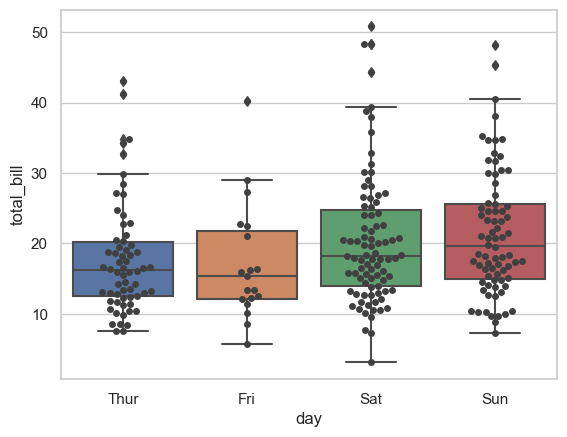

In [148]:
sns.boxplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color=".25")

<Axes: xlabel='day', ylabel='tip'>

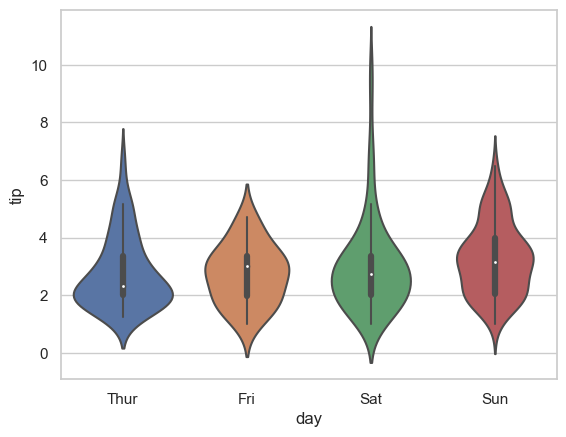

In [150]:
sns.violinplot(x='day',y='tip',data=tips)

小提琴圖即反映了數據的離群情況，同時也反映了數據的分布密度。<br>
此函數跟箱型圖一樣，也有hue參數，可以查看第二個分類屬性下的數據分布，如下：


<Axes: xlabel='day', ylabel='tip'>

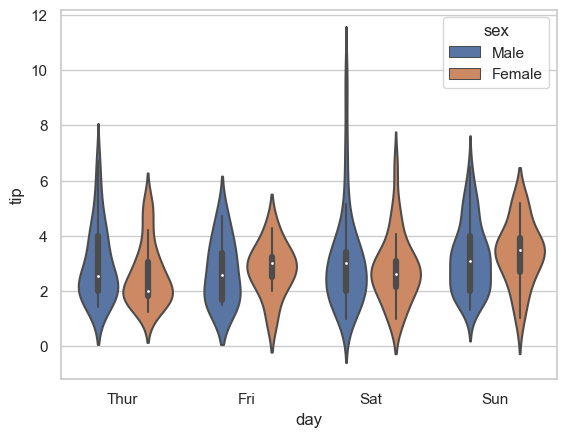

In [152]:
sns.violinplot(x='day',y='tip',hue='sex',data=tips)

可以看到，上面的小提琴圖是4對8個，即當設置hue參數為sex時，每個小提琴的數據集是一類數據，那有沒有辦法讓男性對應數據和女性對應數據都作為一個數據集繪製出一個小提琴圖，只是在一個圖中區分男性數據和女性數據呢？答案是肯定的，violinplot()函數提供了一個split參數，可以做到以上需求，如下：


<Axes: xlabel='day', ylabel='tip'>

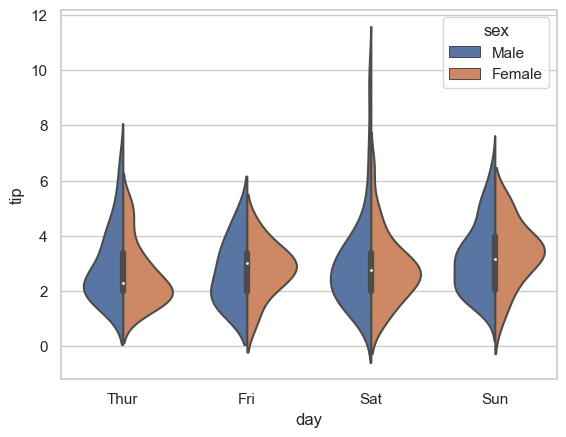

In [154]:
sns.violinplot(x='day',y='tip',hue='sex',data=tips,split=True)

除此以外，我們再來看一下inner參數，上面的小提琴圖中內部都是箱型圖，通過inner參數，我們可以設置其他類型，inner可選參數有：box、quartile(四分位)、point、stick。我們依次看下：


<Axes: xlabel='day', ylabel='tip'>

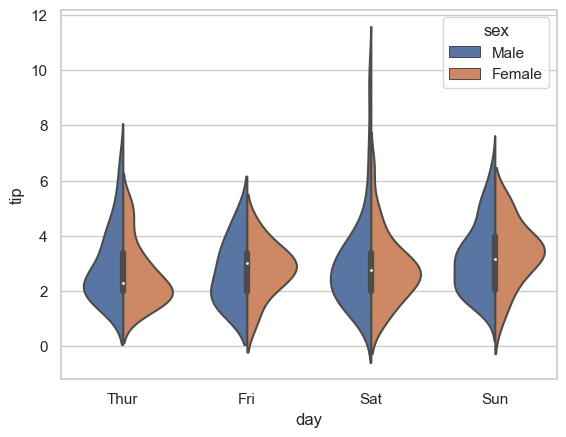

In [158]:
sns.violinplot(x='day',y='tip',hue='sex',data=tips,split=True,inner="box")

<Axes: xlabel='day', ylabel='tip'>

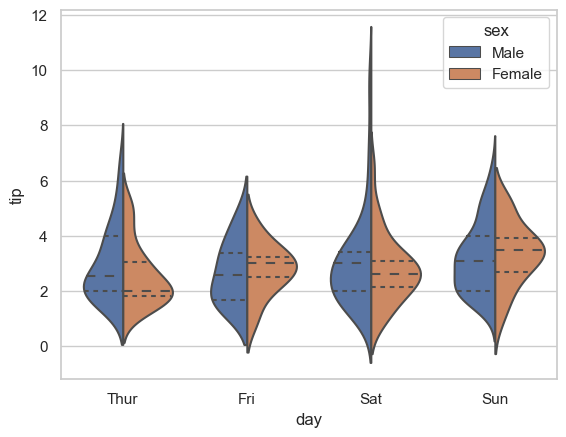

In [160]:
sns.violinplot(x='day',y='tip',hue='sex',data=tips,split=True,inner="quartile")

<Axes: xlabel='day', ylabel='tip'>

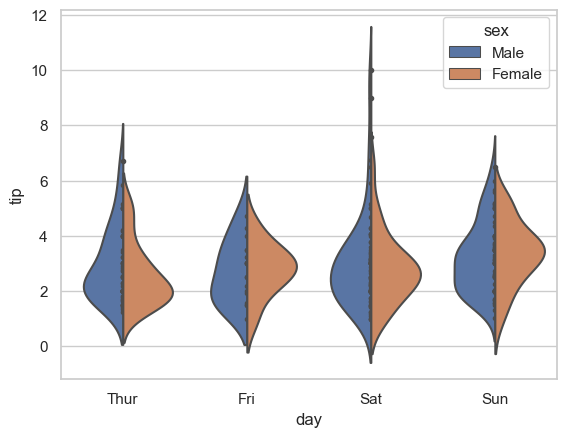

In [162]:
sns.violinplot(x='day',y='tip',hue='sex',data=tips,split=True,inner="point")

<Axes: xlabel='day', ylabel='tip'>

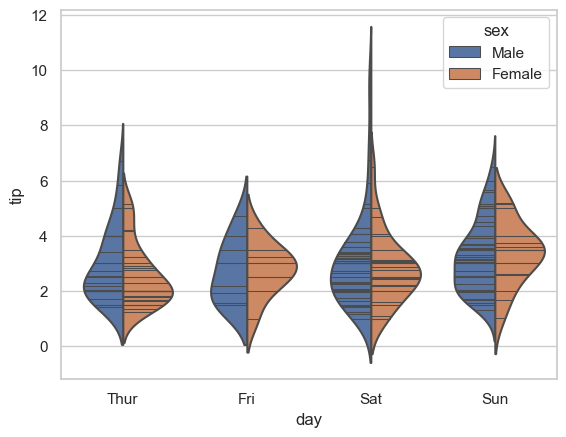

In [164]:
sns.violinplot(x='day',y='tip',hue='sex',data=tips,split=True,inner="stick")

# #結構化展示多維數據
***Visualizing the multidimensional relationships among the samples is as easy as calling sns.pairplot:***

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

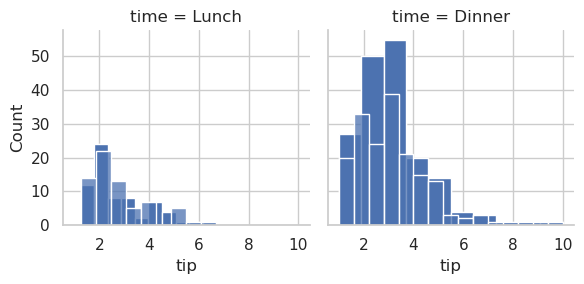

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

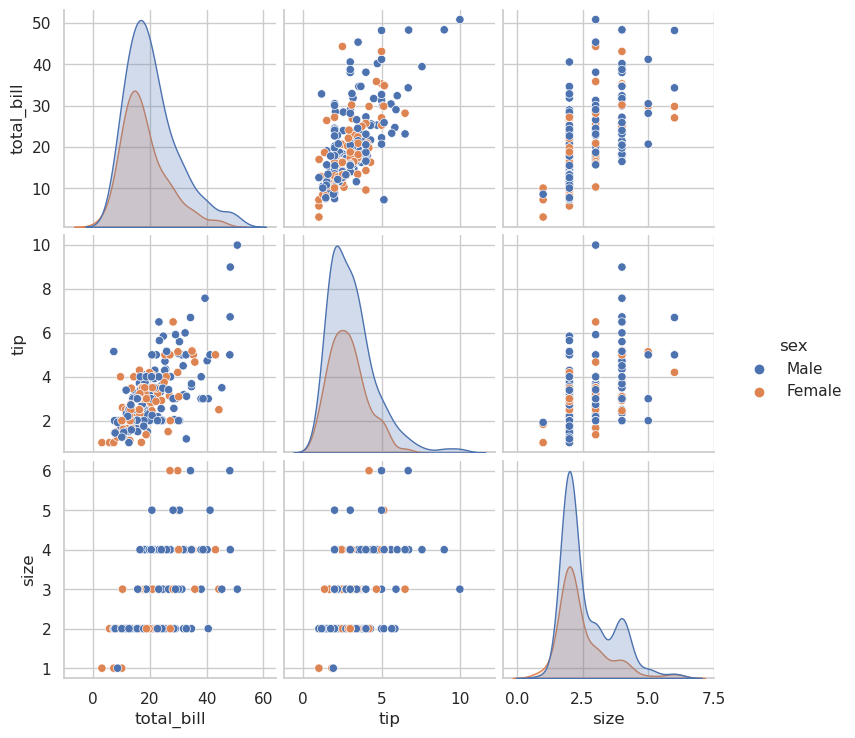

In [225]:
sns.pairplot(tips, hue='sex', height=2.5)

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

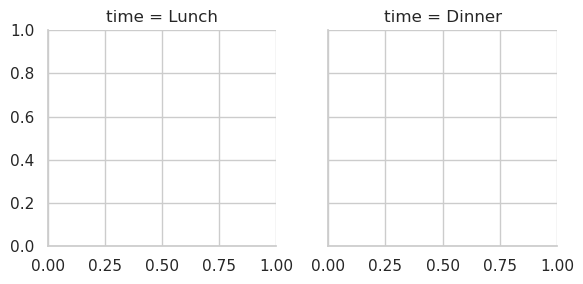

In [232]:
g = sns.FacetGrid(tips,col="time")
plt.show()

使用FacetGrid時，我們會通過一個pandas DataFrame以及控制圖形網格的行、列和顏色的變量名稱來初始化一個對象。這些維度變量（控制行、列和顏色的變量）應該是分類變量或者離散變量，然後這些變量的不同水平組合起來就構成了整個圖形的每一個子圖（facet，在這裡可以理解為我們維度拆解的最小粒度）


這一函數的目標是一步到位地提供一幅完整的成品圖，它在完成繪圖後還會對每個坐標軸添加注釋。

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

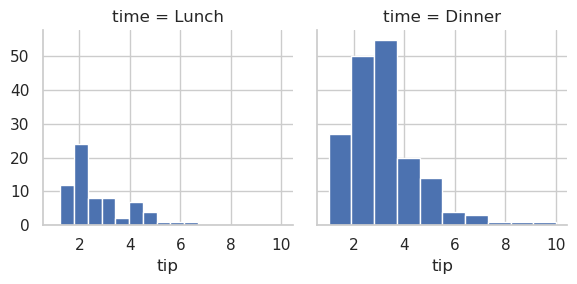

In [230]:
g.map(plt.hist, "tip")
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

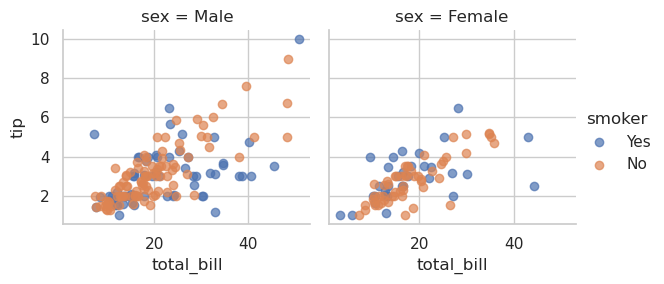

In [242]:
g=sns.FacetGrid(tips,col="sex",hue='smoker')
g.map(plt.scatter,"total_bill","tip",alpha=.7)
g.add_legend()

我們可以指定某個seaborn調色板，也可以通過字典將hue變量中的每個分類與其對應的matplotlib顏色傳遞給函數<br>
（這樣就可以隨心所以使用大量的matplotlib支持的色彩）


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

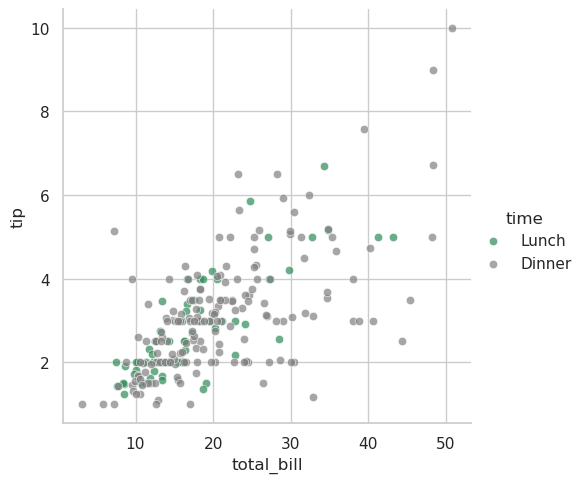

In [244]:
pal=dict(Lunch="seagreen",Dinner="gray")
g=sns.FacetGrid(tips,hue='time',palette=pal,height=5)
g.map(plt.scatter,"total_bill","tip",alpha=.7,linewidth=.5,edgecolor='white')
g.add_legend()


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

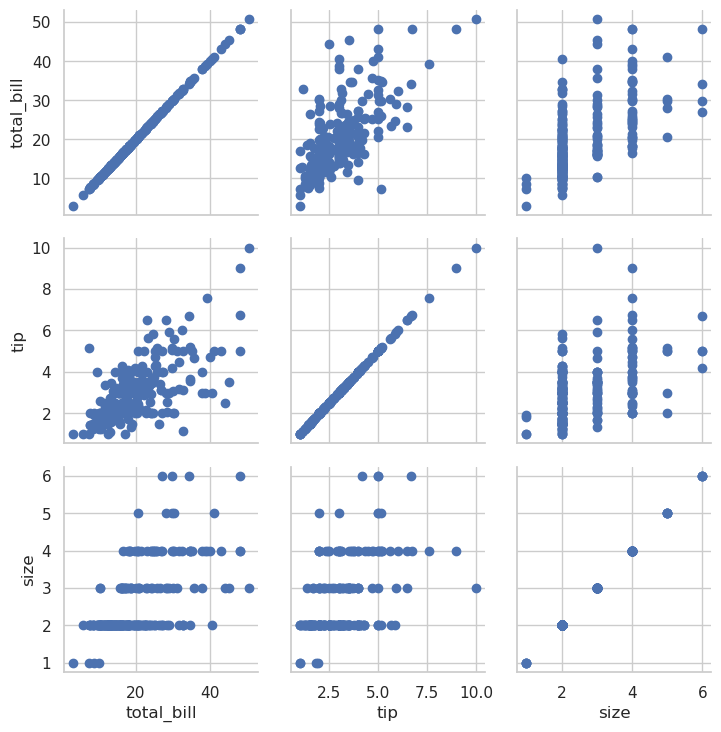

In [246]:
tips=sns.load_dataset('tips')
g=sns.PairGrid(tips)
g.map(plt.scatter);

map_diag()函數是繪製對角線上的單變量子圖，mag_offdiag是繪製對角線以外的兩個變量間的子圖。

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

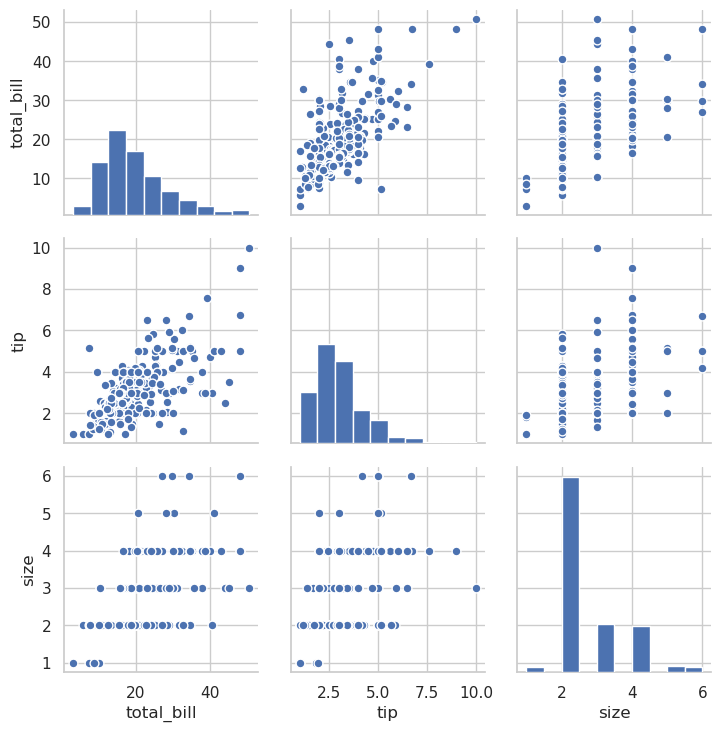

In [248]:
g=sns.PairGrid(tips)
g=g.map_diag(plt.hist,edgecolor="w")
g=g.map_offdiag(plt.scatter,edgecolor="w",s=40)


# [練習]試著讀取自己的資料，繪製出多維數據圖表

In [250]:
#導入需要的依賴包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['SimHei'] 
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [252]:
#導入數據集 
import pandas as pd
import os

# 文件路徑
file_path = '/Users/hejiaxin/OneDrive - KAOHSIUNG MEDICAL UNIVERSITY/TAIWAN SMART HEALTH GALA名單.xlsx'

# 檢查文件是否存在
if os.path.exists(file_path):
    # 使用Pandas讀取Excel文件
    df = pd.read_excel(file_path)
    # 顯示數據框的前幾行
    print(df.head())
else:
    print(f"文件 {file_path} 不存在")

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

   No. Category                             Company               Name  \
0    1      商務部         U.S. Department of Commerce   Dusan Marinkovic   
1    2      商務部    U.S. Commercial Service - Taiwan          Grace Tao   
2    3      州政府                     City of Phoenix  Claudia Whitehead   
3    4      州政府     Maryland Department of Commerce     Matthew Cimino   
4    5     醫療機構  Children's National Medical Center       Haiyin Chang   

                                 Title Country  
0   Sr. International Trade Specialist  U.S.A.  
1                Commercial Specialist  U.S.A.  
2                Bioscience Healthcare  U.S.A.  
3  Innovation and Business Development  U.S.A.  
4           Senior Licensing Associate  U.S.A.  


In [ ]:
sns.pairplot(df, hue='Country', height=2.5)

In [ ]:
g = sns.FacetGrid(df,col="Country")
# 使用 map 函數指定要在每個子圖中繪製的圖形
g.map(sns.histplot, "Country")